In [36]:
%matplotlib inline 
from GA_Main import *

from GA_Taskinitializer import *
from GA_Initializer import *
from GA_Evaluator import *
from GA_Selector import *
from GA_Recombiner import *
from GA_Mutator import *
from GA_Replacer import *
from GA_Terminator import *
from ACO_Main import ACO

from ACO_Initializer import ACO_Initializer
from ACO_SolutionGenerator import SolutionGenerator
from ACO_Evaporator import Evaporator
from ACO_Intensificator import Intensificator

aco_initializer = ACO_Initializer()
aco_solutiongenerator = SolutionGenerator()
aco_evaporator = Evaporator()
aco_intensificator = Intensificator()


from GA_Taskinitializer import *
import matplotlib.pyplot as plt
import os
from matplotlib.cm import get_cmap
#PATH_HOME = os.sep.join(os.getcwd().split(os.sep)[:-1])
#PATH_PROBLEM = os.sep.join(['Problem','VRP1'])
PATH_HOME = os.getcwd()
PATH_PROBLEM = 'Problem'+os.sep+ 'VRP1'
PATH = os.sep.join([PATH_HOME,PATH_PROBLEM])
task_initializer = Taskinitializer()
dist_matrix, capacities, trans_cost, demands = task_initializer.initialize_task(PATH)
task_initializer = Taskinitializer()



def draw_records(record_best,record_worst,record_mean):
    plt.figure(figsize=(20,20))
    arange = list(range(len(record_best)))
    plt.ylim(5000,20000)
    plt.plot(arange,record_best, "g")
    plt.plot(arange,record_worst, "r")
    plt.fill_between(arange,record_best,record_worst,color="lightyellow")
    plt.plot(arange,record_mean, "b")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.plot()

def draw_fitnesses(fitnesses):
    plt.figure(figsize=(20,20))
    
    plt.ylim(5000,20000)
    tp_fitnesses = np.transpose(np.array(fitnesses))
    cmap = get_cmap('RdYlGn')
    for i,f in enumerate(tp_fitnesses):
        rgba = cmap(i/len(tp_fitnesses))
        arange = list(range(len(f)))
        plt.plot(arange, f, color=rgba)
        #plt.plot(arange,record_worst, "r")
        #plt.fill_between(arange,record_best,record_worst,color="lightyellow")
        #plt.plot(arange,record_mean, "g")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')    
    plt.plot()

initializing population
...done
calculate initial fitness-scores for each pop-individual with Greedy 
	   -initial mean score: 11311.02
	   -initial best score: 5353
	   -initial worst score: 16143
Iteration:  0
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individuals with offspring
	   -mean score: 10533.98
	   -best score: 5353
	   -worst score: 14914
Iteration:  1
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individuals with offspring
	   -mean score: 9984.12
	   -best score: 5353
	   -worst score: 14566
Iteration:  2
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individuals with offspring
	   -mean score: 9466.74
	   -best score: 5353
	   -worst score: 14451
Iteration:  3
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individ

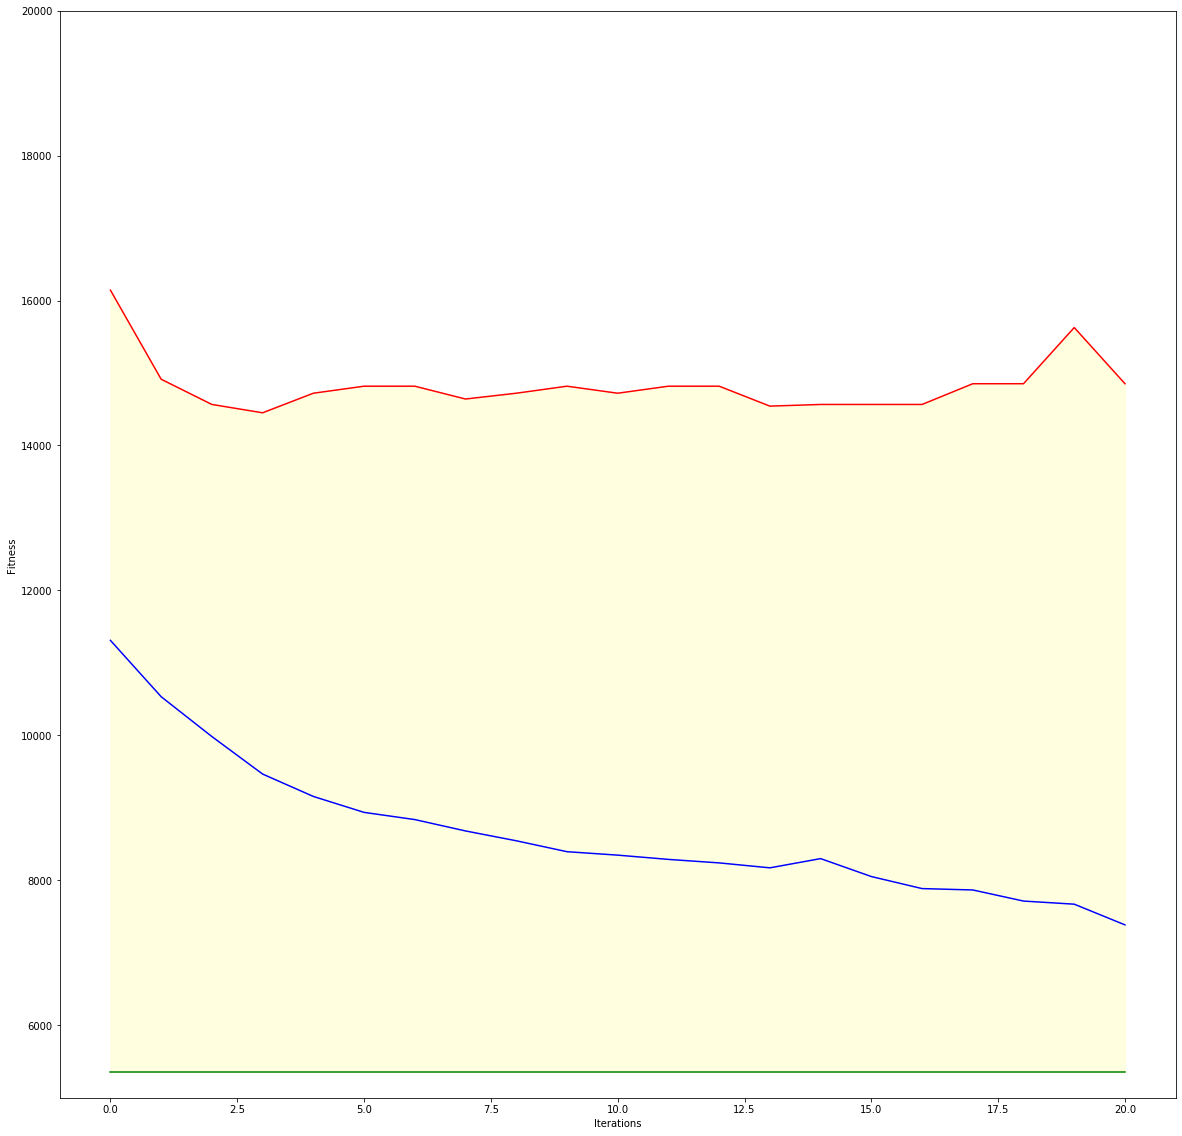

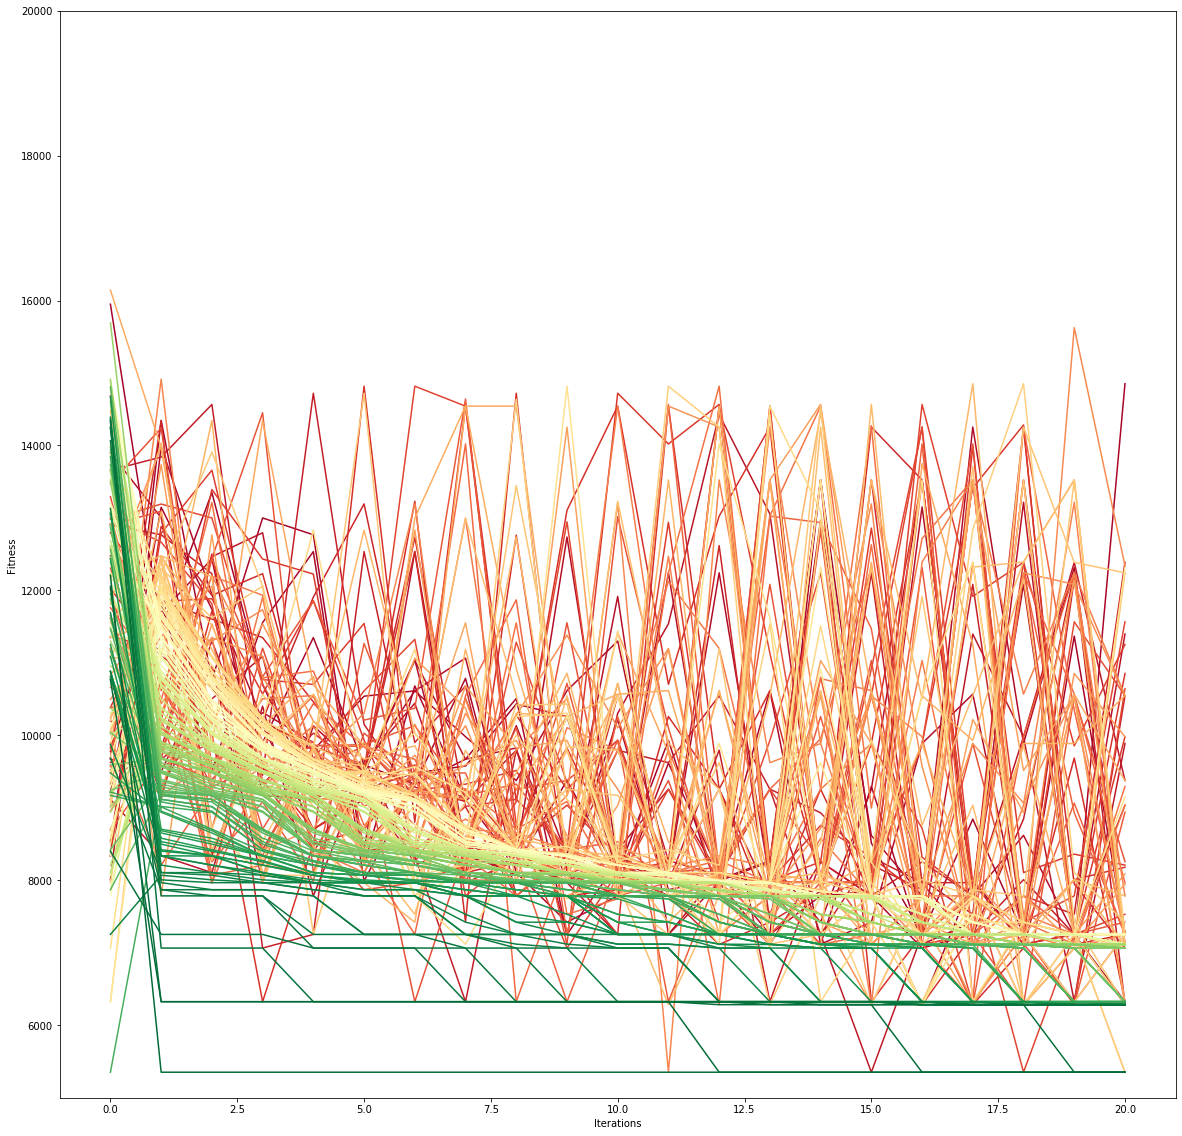

In [38]:

popsize = 200
aco_iterations = 5
mutate_probability = 0.1

aco = ACO(dist_matrix,aco_initializer,aco_solutiongenerator,aco_evaporator,aco_intensificator,aco_iterations,True)

initializer = PartiallyRandomInitializer(popsize,demands,capacities,aco)
evaluator = Evaluator(trans_cost,dist_matrix,aco)
selector = Roulette_Selector(offspring_size= 50)
recombiner = Ordered_Recombiner(initializer.capacities)
mutator = Mutator(initializer.capacities)
replacer = Replacer()
terminator = Terminator(limit = 20)
n = 2


ga = GA(initializer, evaluator, selector, recombiner, mutator, replacer, terminator, aco, n)
ga.run()

draw_records(ga.record_best,ga.record_worst,ga.record_mean)
draw_fitnesses(ga.record_fitnesses)

initializing population
...done
calculate initial fitness-scores for each pop-individual with Greedy 
	   -initial mean score: 11299.48
	   -initial best score: 5518
	   -initial worst score: 16078
Iteration:  0
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individuals with offspring
	   -mean score: 10843.18
	   -best score: 5518
	   -worst score: 16839
Iteration:  1
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individuals with offspring
	   -mean score: 10322.7
	   -best score: 5518
	   -worst score: 15330
Iteration:  2
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak individuals with offspring
	   -mean score: 10118.89
	   -best score: 5518
	   -worst score: 14971
Iteration:  3
	selecting parents
	recombine parents
	mutate offspring
	calculate fitness of offspring (greedy)
	replace weak indivi

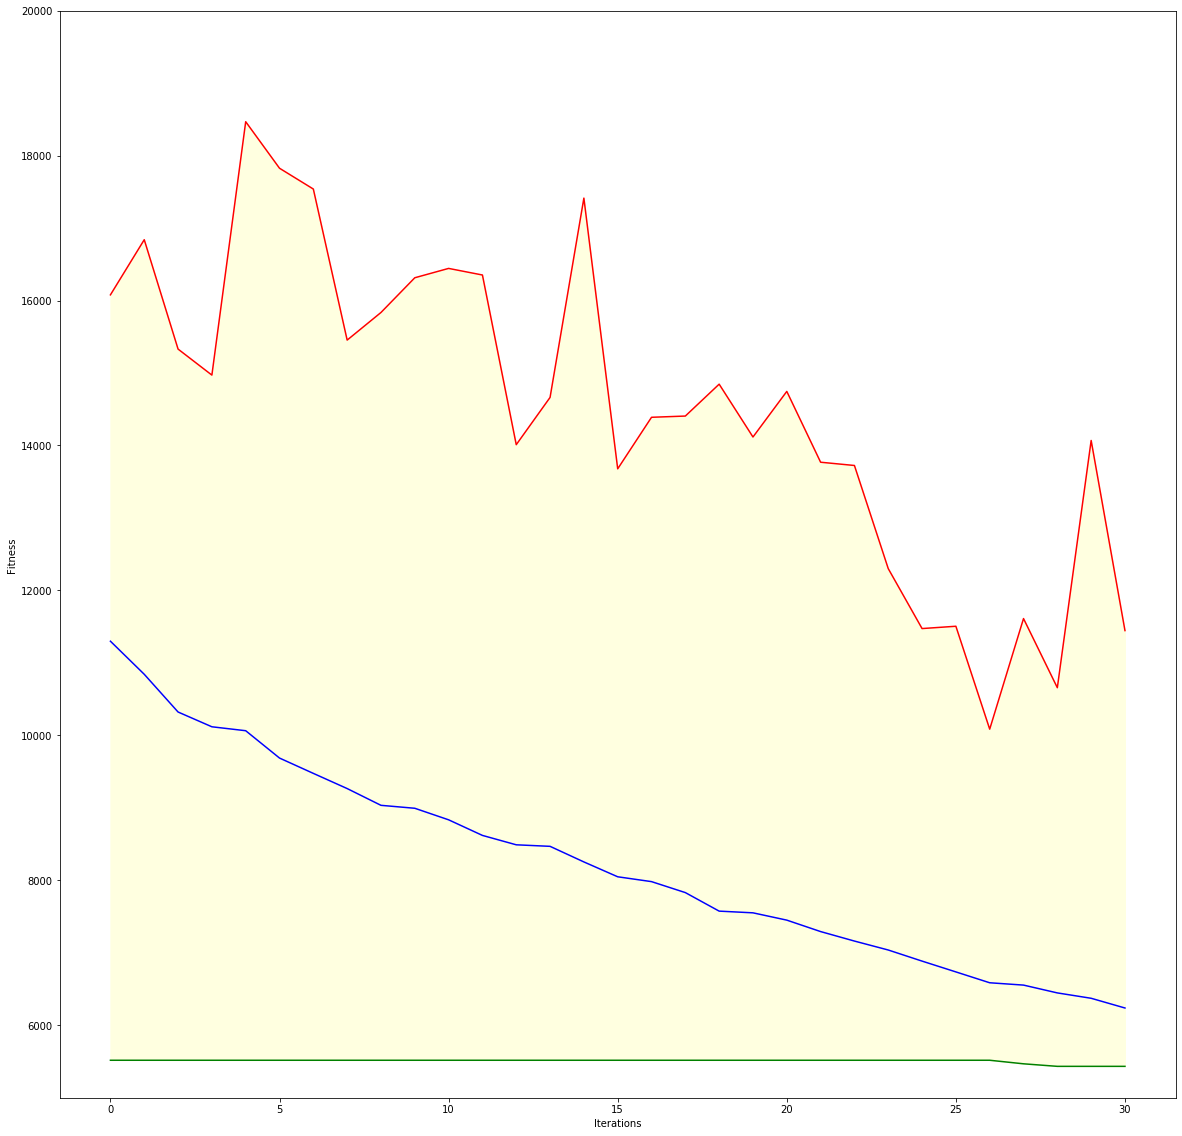

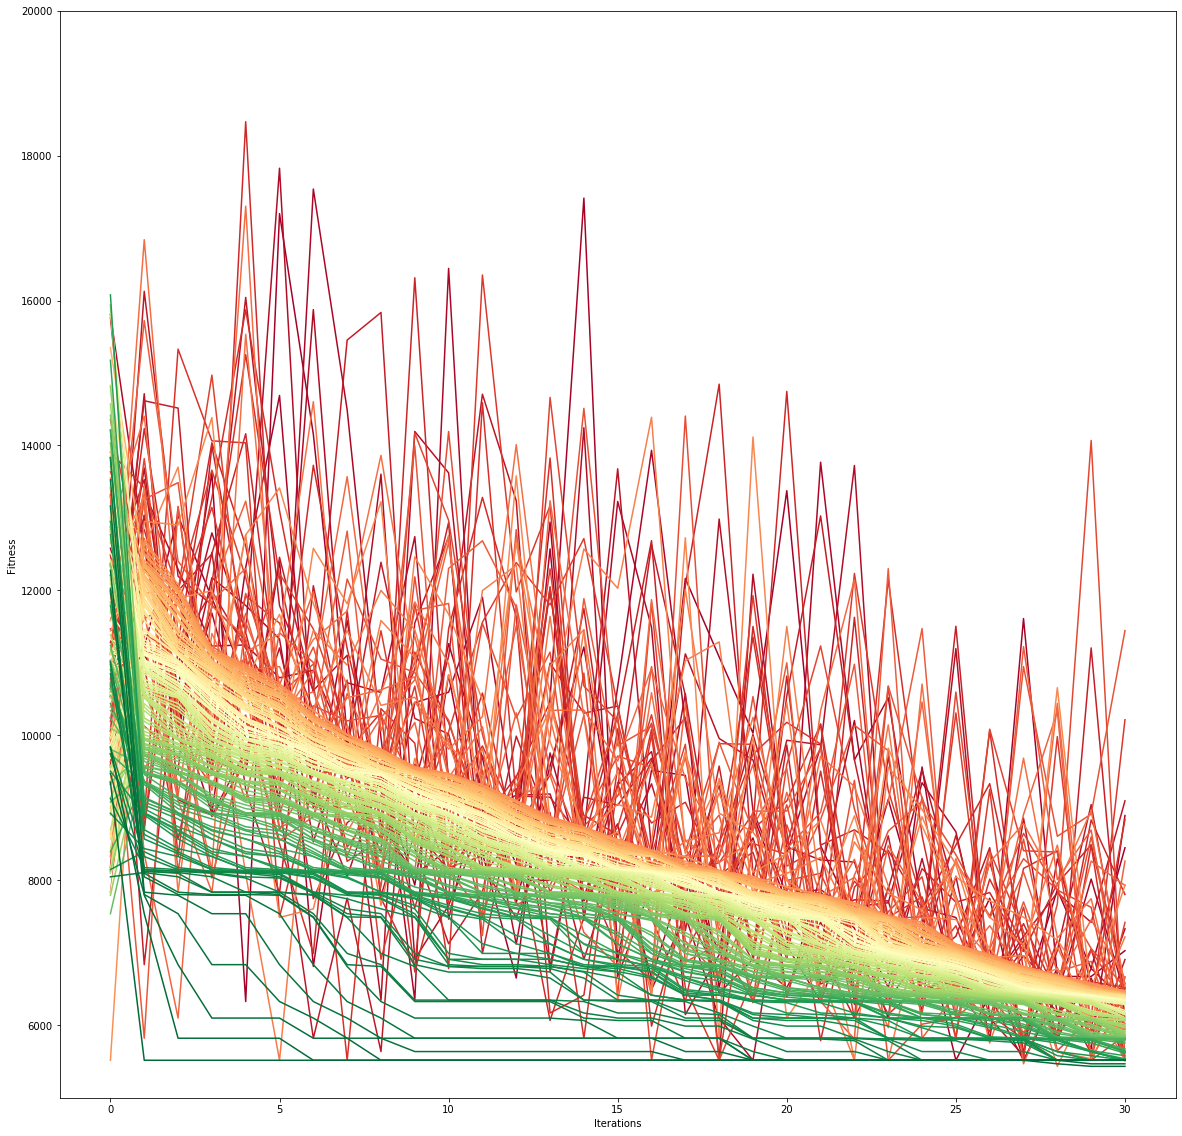

In [39]:

popsize = 200
aco_iterations = 5
mutate_probability = 1

aco = ACO(dist_matrix,aco_initializer,aco_solutiongenerator,aco_evaporator,aco_intensificator,aco_iterations,True)

initializer = PartiallyRandomInitializer(popsize,demands,capacities,aco)
evaluator = Evaluator(trans_cost,dist_matrix,aco)
selector = Roulette_Selector(offspring_size= 50)
recombiner = Simple_Recombiner()
mutator = Simple_Mutator(mutate_probability)
replacer = Replacer()
terminator = Terminator(limit = 30)
n = 2


ga = GA(initializer, evaluator, selector, recombiner, mutator, replacer, terminator, aco, n)
ga.run()

draw_records(ga.record_best,ga.record_worst,ga.record_mean)
draw_fitnesses(ga.record_fitnesses)

In [11]:
np.random.uniform(0,1) < mutate_probability

False

In [13]:
sm = Simple_Mutator(mutate_probability=1)
sm.mutate([{'vehicle_capacities':[1,2,3,4,5,6],'customer_demands':[1,2,3,4,5,6]}])

[{'customer_demands': [1, 2, 3, 4, 5, 6],
  'vehicle_capacities': [5, 2, 3, 4, 1, 6]}]